<a href="https://colab.research.google.com/github/Fonteleee/ipeadata/blob/main/PPROJETOFINAL_MVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instação pyspark

!pip install pyspark==3.3.2
!apt-get install openjdk-8-jdk-headless -qq > /dev/nullk
!wget -q https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
!tar xf spark-3.3.2-bin-hadoop3.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop3"

import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master('local[*]') \
    .appName('Iniciando com Spark') \
    .getOrCreate()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 16.1 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824013 sha256=ee7b3487fea3cccf697aabc16cd91a711ea7e7cb85c67499642f68c976abe374
  Stored in directory: /root/.cache/pip/wheels/89/d6/52/1178e354ba2207673484f0ccd7b2ded0ab6671ae5c1fc5b49a
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
#UPLOAD ARQUIVO
from google.colab import files
arquivo = files.upload()

Saving FOORUM.csv to FOORUM.csv


In [ ]:
df.printSchema()

root
 |-- Data: string (nullable = true)
 |-- 2011: double (nullable = true)
 |-- 2012: double (nullable = true)
 |-- 2013: double (nullable = true)
 |-- 2014: double (nullable = true)
 |-- 2015: double (nullable = true)
 |-- 2016: double (nullable = true)
 |-- 2017: double (nullable = true)
 |-- 2018: double (nullable = true)
 |-- 2019: double (nullable = true)
 |-- 2020: double (nullable = true)
 |-- 2021: double (nullable = true)



In [ ]:
# LENDO O ARQUIVOO
df = spark.read.csv('FOORUM.csv', header=True, inferSchema=True, sep=";")



In [ ]:
# EXIBIR A BASE DE DADOS
df.show(34, truncate=False)

+-------------------+------+------+------+------+------+------+------+------+------+------+------+
|Data               |2011  |2012  |2013  |2014  |2015  |2016  |2017  |2018  |2019  |2020  |2021  |
+-------------------+------+------+------+------+------+------+------+------+------+------+------+
|Mortes/Ano         |47.215|54.694|55.847|59.73 |58.459|61.597|64.078|57.592|47.742|50.448|47.503|
|Região Norte       |3.303 |5.833 |5.902 |6.261 |6.742 |7.422 |7.872 |8.074 |6.454 |5.758 |6.291 |
|Acre               |148.0 |189.0 |215.0 |204.0 |234.0 |368.0 |530.0 |417.0 |296.0 |322.0 |192.0 |
|Amazonas           |1.102 |1.16  |985.0 |1.201 |1.447 |1.189 |1.285 |1.234 |1.172 |1.121 |1.67  |
|Amapá              |26.0  |174.0 |245.0 |274.0 |250.0 |399.0 |434.0 |484.0 |461.0 |356.0 |472.0 |
|Pará               |1.269 |3.401 |3.536 |3.611 |3.772 |4.207 |4.527 |4.72  |3.497 |2.876 |2.881 |
|Rondônia           |418.0 |515.0 |495.0 |540.0 |542.0 |586.0 |506.0 |431.0 |402.0 |413.0 |454.0 |
|Roraima  

In [ ]:
# SELECIONANDO ALGUMAS TABELASSS
df_FOORUM = df.select('Data', '2012', '2013' , '2014' , '2017')

In [ ]:
#SELECIONANDO ALGUMAS TABELAS
df_FOORUM.show(34, truncate=False)


+-------------------+------+------+------+------+
|Data               |2012  |2013  |2014  |2017  |
+-------------------+------+------+------+------+
|Mortes/Ano         |54.694|55.847|59.73 |64.078|
|Região Norte       |5.833 |5.902 |6.261 |7.872 |
|Acre               |189.0 |215.0 |204.0 |530.0 |
|Amazonas           |1.16  |985.0 |1.201 |1.285 |
|Amapá              |174.0 |245.0 |274.0 |434.0 |
|Pará               |3.401 |3.536 |3.611 |4.527 |
|Rondônia           |515.0 |495.0 |540.0 |506.0 |
|Roraima            |72.0  |107.0 |78.0  |211.0 |
|Tocantins          |322.0 |319.0 |353.0 |379.0 |
|Região Nordeste    |20.724|22.274|23.737|27.288|
|Alagoas            |2.171 |2.273 |2.201 |1.926 |
|Bahia              |6.53  |6.026 |6.366 |6.979 |
|Ceará              |3.734 |4.432 |4.492 |5.329 |
|Maranhão           |1.666 |1.782 |2.158 |2.058 |
|Paraíba            |1.54  |1.537 |1.513 |1.286 |
|Pernambuco         |3.321 |3.097 |3.434 |5.427 |
|Piauí              |529.0 |551.0 |734.0 |653.0 |


In [ ]:
from pyspark.sql.functions import col

#  somente valores absolutos e seus respectivos anos
df_soma = df.limit(1).select([sum(col(c)).alias(c) for c in df.columns[1:]])

df_soma.show()



+------+------+------+-----+------+------+------+------+------+------+------+
|  2011|  2012|  2013| 2014|  2015|  2016|  2017|  2018|  2019|  2020|  2021|
+------+------+------+-----+------+------+------+------+------+------+------+
|47.215|54.694|55.847|59.73|58.459|61.597|64.078|57.592|47.742|50.448|47.503|
+------+------+------+-----+------+------+------+------+------+------+------+



In [ ]:
# Ano com maior indice
from pyspark.sql.functions import count

df_sum = df_FOORUM.groupBy('2017').agg(count('*').alias('2018'))
df_sum.show()


+------+----+
|  2017|2018|
+------+----+
| 6.749|   1|
| 379.0|   1|
| 1.053|   1|
| 6.844|   1|
| 434.0|   1|
| 1.285|   1|
| 6.979|   1|
| 4.136|   1|
| 5.427|   1|
| 1.508|   1|
|64.078|   1|
| 4.831|   1|
| 2.058|   1|
| 2.557|   1|
| 1.275|   1|
| 530.0|   1|
| 1.286|   1|
|27.288|   1|
| 3.132|   1|
| 557.0|   1|
+------+----+
only showing top 20 rows



In [ ]:
# Somando todos os valores e calculando a media por ano de mortes violentas intencionais



valores = [47.215, 54.694, 55.847, 59.730, 58.459, 61.597, 64.078, 57.592, 47.742, 50.448, 47.503]

soma_total = 0

for valor in valores:
    soma_total += valor

media = soma_total / len(valores)

print("Média dos valores:")
print(media)



Média dos valores:
54.991363636363644


<ipython-input-4-6ea62eb38ec6>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


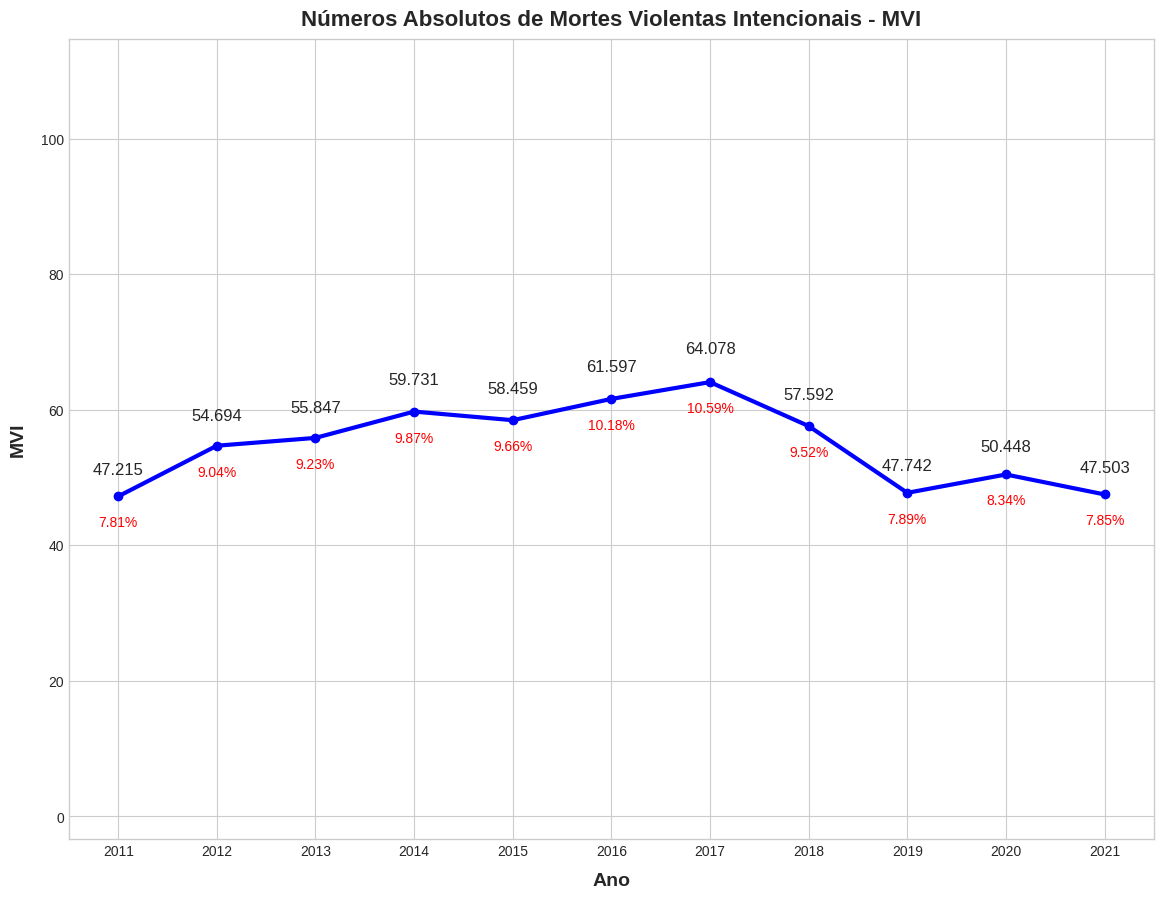

In [ ]:
import matplotlib.pyplot as plt

# Dados
anos = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
valores = [47.215, 54.694, 55.847, 59.731, 58.459, 61.597, 64.078, 57.592, 47.742, 50.448, 47.503]

# Estilo
plt.style.use('seaborn-whitegrid')

# Figura
plt.figure(figsize=(14, 20))  

# Criar o gráfico
plt.plot(anos, valores, marker='o', linestyle='-', color='blue', linewidth=3)

# Valores nas linhas
for i in range(len(anos)):
    offset = valores[i] * 0.06
    plt.text(anos[i], valores[i] + offset, str(valores[i]), ha='center', va='bottom', fontsize=12)

# Cálculo taxa percentual
soma_valores = sum(valores)
taxa_percentual = [(valor / soma_valores) * 100 for valor in valores]

# Exibir taxa percentualll
for i in range(len(anos)):
    x = anos[i]
    y = valores[i]
    plt.text(x, y - offset, f'{taxa_percentual[i]:.2f}%', ha='center', va='top', fontsize=10, color='red')

# Título e eixos
plt.title('Números Absolutos de Mortes Violentas Intencionais - MVI', fontsize=16,pad=10, fontweight='bold')  
plt.xlabel('Ano', fontsize=14, labelpad=10, fontweight='bold')
plt.ylabel('MVI', fontsize=14, labelpad=10, fontweight='bold')

# Ajuste da altura
min_valor = min(valores)
max_valor = max(valores)
delta = (max_valor - min_valor) * 3
plt.ylim(min_valor - delta, max_valor + delta)

# Definir todos os anos
plt.xticks(anos, rotation=0)

# Ajuste de margem
plt.subplots_adjust(top=0.9, bottom=0.50)

# Exibir 
plt.show()
